In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
sc = pd.read_csv('streetcar-data.csv')

In [3]:
# Check missing data
sc.isnull().sum()

Date            0
Line          145
Time            0
Day             0
Location        1
Incident        0
Min Delay       0
Min Gap         0
Bound        1921
Vehicle         0
dtype: int64

In [4]:
# Data Cleaning
sc.dropna(axis=0, inplace=True)
# No Streetcar for that specific event
sc = sc[sc["Bound"] != '8']
# Get the count of each location
location_counts = sc["Location"].value_counts()

# Filter locations that occur more than once
locations_to_keep = location_counts[location_counts > 1].index

# Filter the dataframe to keep only rows with locations that occur more than once
sc = sc[sc["Location"].isin(locations_to_keep)]

sc

,Date,Line,Time,Day,Location,Incident,Min Delay,Min Gap,Bound,Vehicle
0,1-Jan-24,505,02:45,Monday,DUNDAS AND MCCAUL,Security,10,20,W,4416
1,1-Jan-24,505,03:06,Monday,COLLEGE AND GLADSTONE,Emergency Services,52,72,E,4461
2,1-Jan-24,503,03:21,Monday,PARLIAMENT AND SHUTTER,Security,0,0,N,4545
3,1-Jan-24,505,03:53,Monday,DUNDAS WEST STATION,Security,37,0,W,4551
4,1-Jan-24,600,04:27,Monday,QUEEN AND BATHURST,Diversion,78,93,E,8116
...,...,...,...,...,...,...,...,...,...,...
13102,30-Nov-24,506,21:46,Saturday,HOWARD PARK AND RONCES,Emergency Services,33,43,E,4415
13104,30-Nov-24,511,23:57,Saturday,GERRARD AND HAMILTON,Collision - TTC Involved,0,0,E,4466
13105,30-Nov-24,505,23:57,Saturday,DUNDAS AND JARVIS,Diversion,10,20,E,4575
13106,30-Nov-24,501,00:42,Saturday,QUEEN AND STRACHAN,Cleaning - Unsanitary,10,20,W,4629


Delays occurred in a day

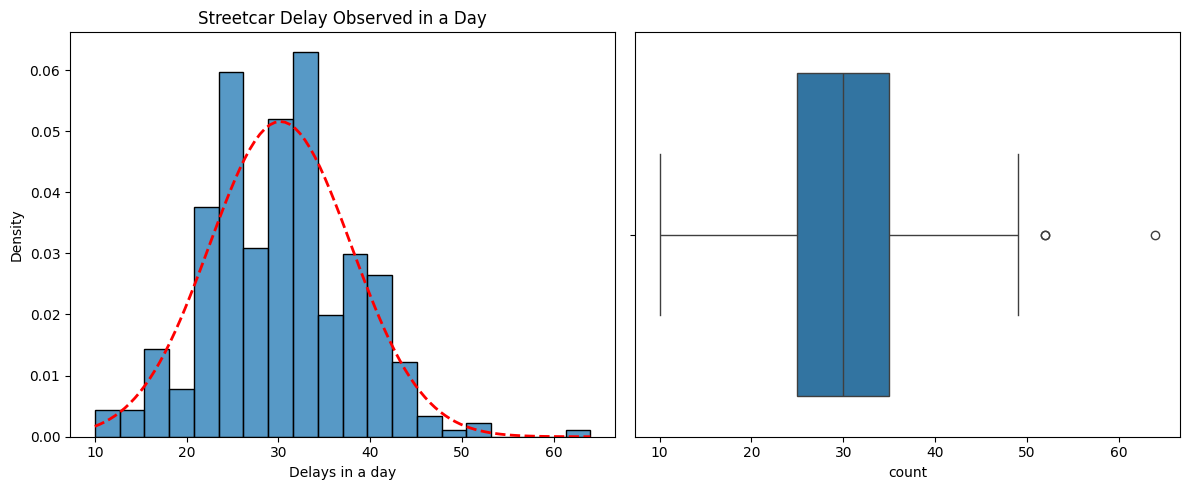

In [5]:
sc_date_counts = sc['Date'].value_counts()
# Fit a normal distribution
mu, sigma = np.mean(sc_date_counts), np.std(sc_date_counts)
x = np.linspace(min(sc_date_counts), max(sc_date_counts), 100)
y = stats.norm.pdf(x, mu, sigma)

# Plot histogram with normal distribution
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Histogram of delay counts
sns.histplot(sc_date_counts, ax=ax[0], bins=20, kde=False, stat="density")
ax[0].plot(x, y, color='red', linestyle='dashed', linewidth=2)  # Normal distribution line
ax[0].set_xlabel("Delays in a day")
ax[0].set_ylabel("Density")
ax[0].set_title("Streetcar Delay Observed in a Day")

# Boxplot
sns.boxplot(x=sc_date_counts, ax=ax[1])

plt.tight_layout()
plt.show()

Delays in minutes

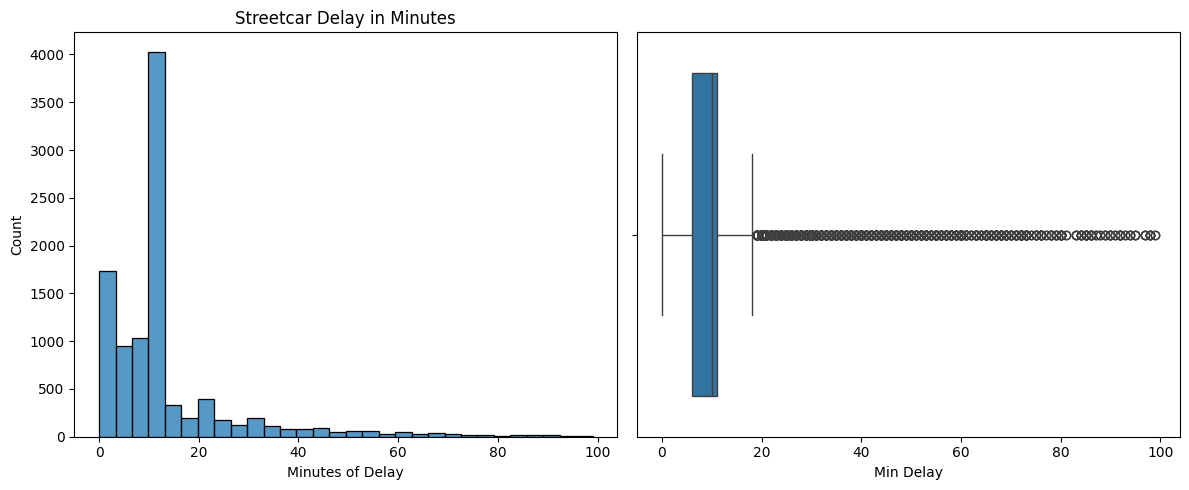

In [6]:
# Filter out extreme delays (keeping <100 minutes)
filtered_delays = sc[sc['Min Delay'] < 100]['Min Delay']

# Plot histogram and boxplot
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Histogram of delay times
sns.histplot(filtered_delays, ax=ax[0], bins=30, kde=False, stat="count")
ax[0].set_xlabel("Minutes of Delay")
ax[0].set_ylabel("Count")
ax[0].set_title("Streetcar Delay in Minutes")

# Boxplot
sns.boxplot(x=filtered_delays, ax=ax[1])

plt.tight_layout()
plt.show()


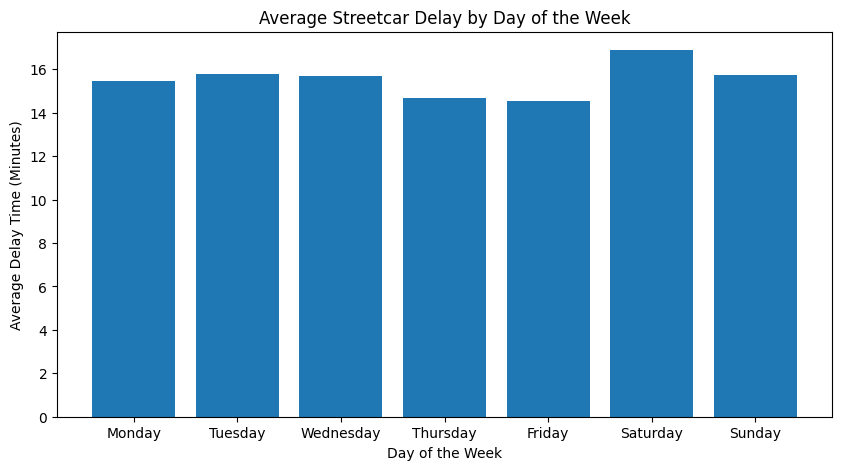

In [7]:
# Calculate average delay per day
avg_delay_per_day = sc.groupby("Day")["Min Delay"].mean()

# Ensure days are in correct order
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
avg_delay_per_day = avg_delay_per_day.reindex(day_order)  # Reorder index

# Plot
plt.figure(figsize=(10, 5))
plt.bar(avg_delay_per_day.index, avg_delay_per_day.values) 

# Labels and title
plt.xlabel("Day of the Week")
plt.ylabel("Average Delay Time (Minutes)")
plt.title("Average Streetcar Delay by Day of the Week")
#plt.xticks(rotation=45) 
plt.show()

In [8]:
sc["Date"] = pd.to_datetime(sc["Date"], dayfirst=False) 
sc["Month"] = sc["Date"].dt.strftime("%B")

C:\Users\Elowe\AppData\Local\Temp\ipykernel_27580\627174662.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sc["Date"] = pd.to_datetime(sc["Date"], dayfirst=False)


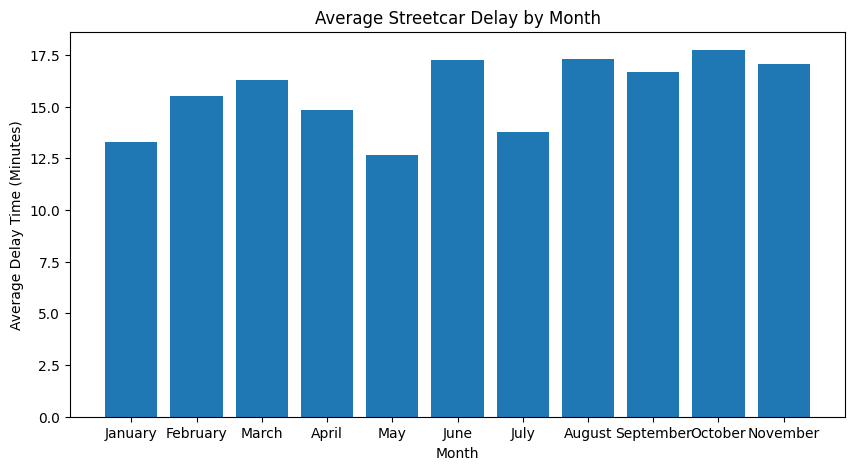

In [9]:
# Define month order
month_order = ["January", "February", "March", "April", "May", "June", 
               "July", "August", "September", "October", "November", "December"]

# Group by month and calculate average delay
avg_delay_per_month = sc.groupby("Month")["Min Delay"].mean().reindex(month_order) 

# Plot
plt.figure(figsize=(10, 5))
plt.bar(avg_delay_per_month.index, avg_delay_per_month.values) 

# Labels and title
plt.xlabel("Month")
plt.ylabel("Average Delay Time (Minutes)")
plt.title("Average Streetcar Delay by Month")
plt.show()

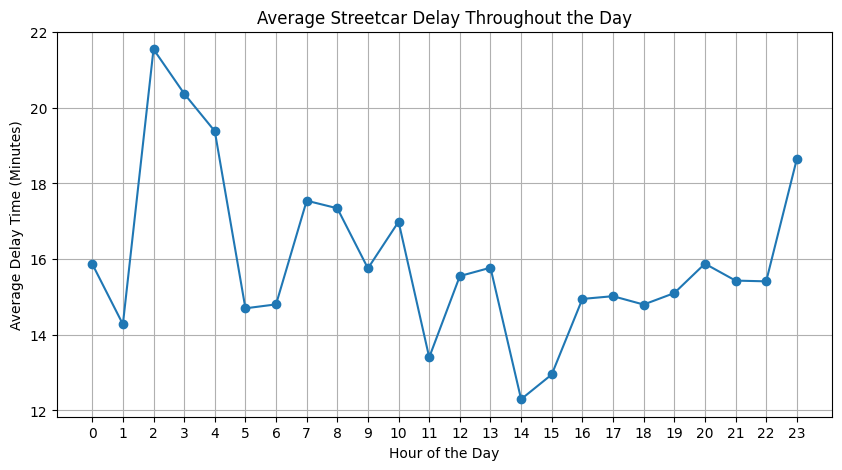

In [10]:
sc["Hour"] = sc["Time"].str[:2].astype(int)
# Group by 'Hour' and calculate the average delay time
avg_delay_per_hour = sc.groupby("Hour")["Min Delay"].mean()

# Plotting the line plot
plt.figure(figsize=(10, 5))
plt.plot(avg_delay_per_hour.index, avg_delay_per_hour.values, marker="o", linestyle="-")

# Labels and title
plt.xlabel("Hour of the Day")
plt.ylabel("Average Delay Time (Minutes)")
plt.title("Average Streetcar Delay Throughout the Day")
plt.xticks(range(0, 24))  # Ensure all hours (0-23) appear on the x-axis
plt.grid(True)  # Add grid for better readability

plt.show()

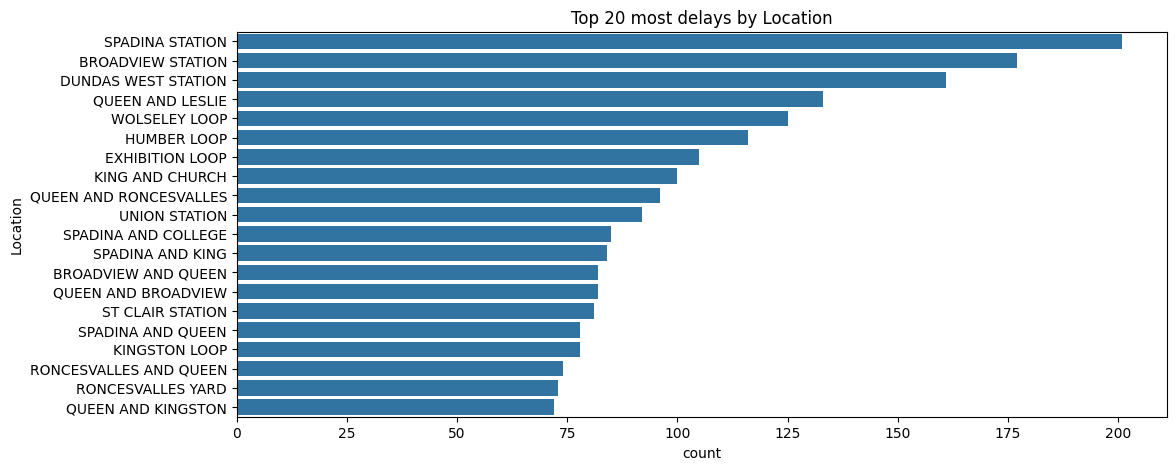

In [11]:
plt.figure(figsize=(12,5))
sns.countplot(y=sc['Location'], order= sc['Location'].value_counts().iloc[:20].index);
plt.title("Top 20 most delays by Location");

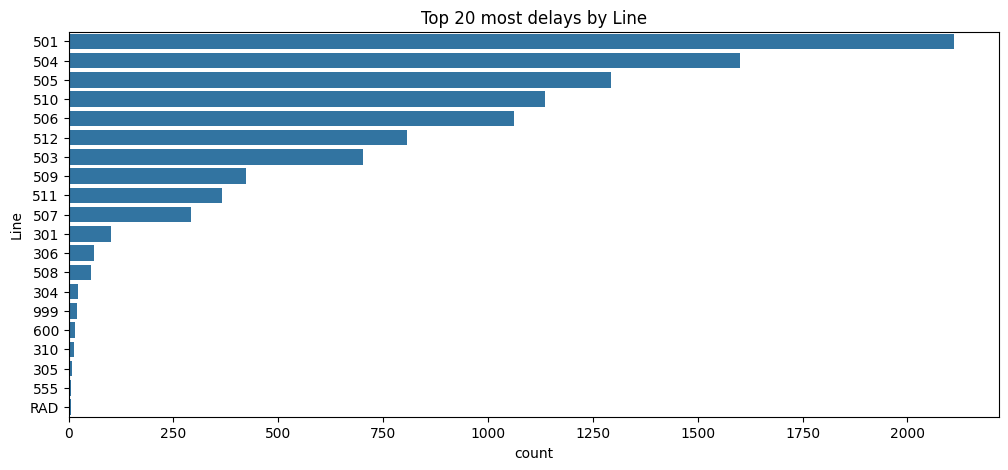

In [12]:
plt.figure(figsize=(12,5))
sns.countplot(y=sc['Line'], order= sc['Line'].value_counts().iloc[:20].index);
plt.title("Top 20 most delays by Line");

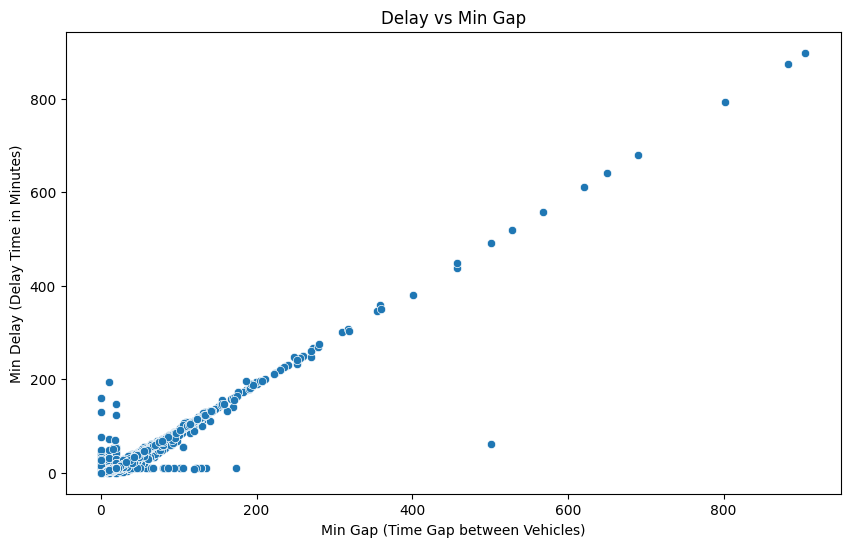

In [13]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=sc, x='Min Gap', y='Min Delay')

plt.title('Delay vs Min Gap')
plt.xlabel('Min Gap (Time Gap between Vehicles)')
plt.ylabel('Min Delay (Delay Time in Minutes)')

plt.show()

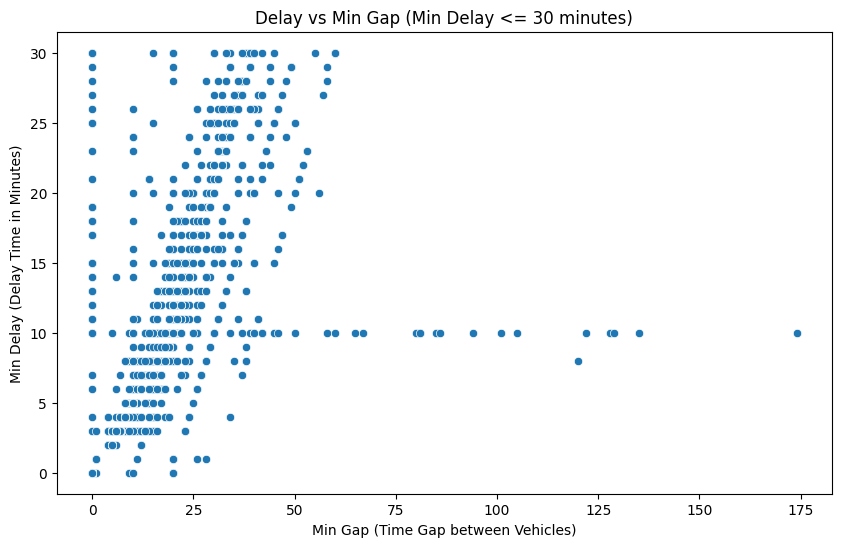

In [14]:
filtered_data = sc[sc['Min Delay'] <= 30]

# Scatter plot: Min Delay vs Min Gap for delays <= 30 minutes
plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_data, x='Min Gap', y='Min Delay')

# Adding labels and title
plt.title('Delay vs Min Gap (Min Delay <= 30 minutes)')
plt.xlabel('Min Gap (Time Gap between Vehicles)')
plt.ylabel('Min Delay (Delay Time in Minutes)')

# Display plot
plt.show()

C:\Users\Elowe\AppData\Local\Temp\ipykernel_27580\1589882477.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Incident', y='Min Delay', data= sc, ci=None);


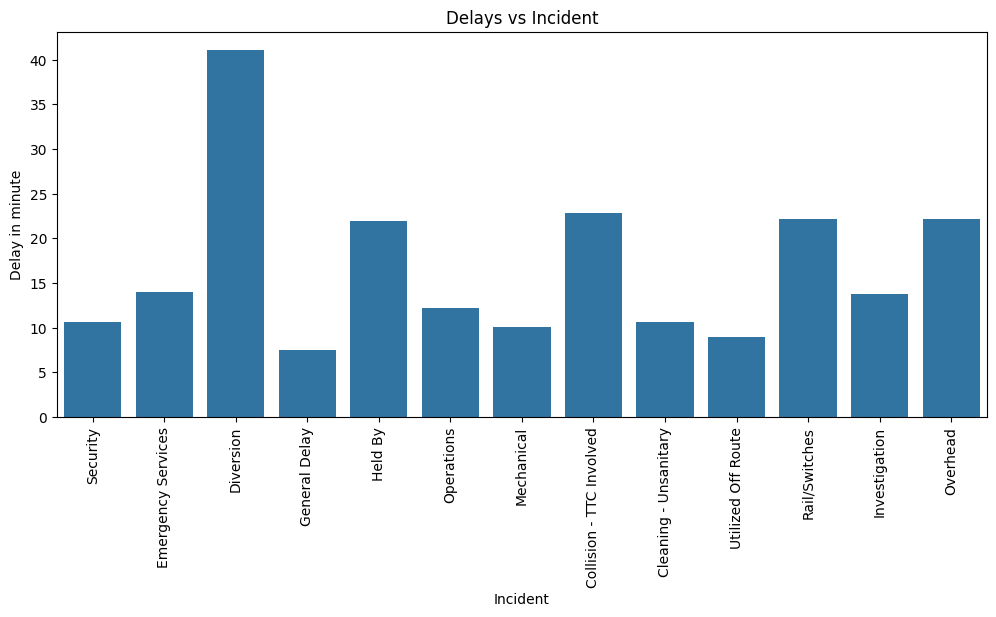

In [15]:
plt.figure(figsize=(12,5))
sns.barplot(x='Incident', y='Min Delay', data= sc, ci=None);
plt.title("Delays vs Incident")
plt.xlabel("Incident")
plt.ylabel("Delay in minute");
plt.xticks(rotation=90);

C:\Users\Elowe\AppData\Local\Temp\ipykernel_27580\1490277223.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Bound', y='Min Delay', data= sc, ci=None);


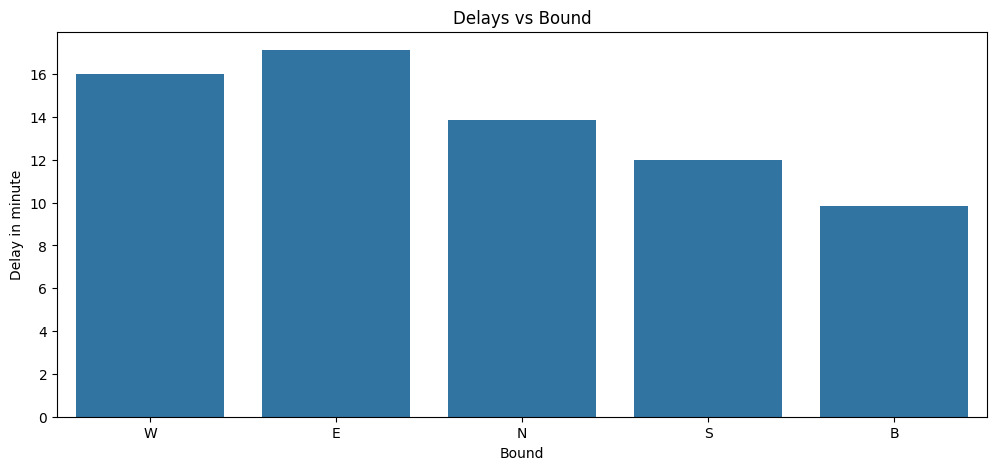

In [16]:
plt.figure(figsize=(12,5))
sns.barplot(x='Bound', y='Min Delay', data= sc, ci=None);
plt.title("Delays vs Bound")
plt.xlabel("Bound")
plt.ylabel("Delay in minute");

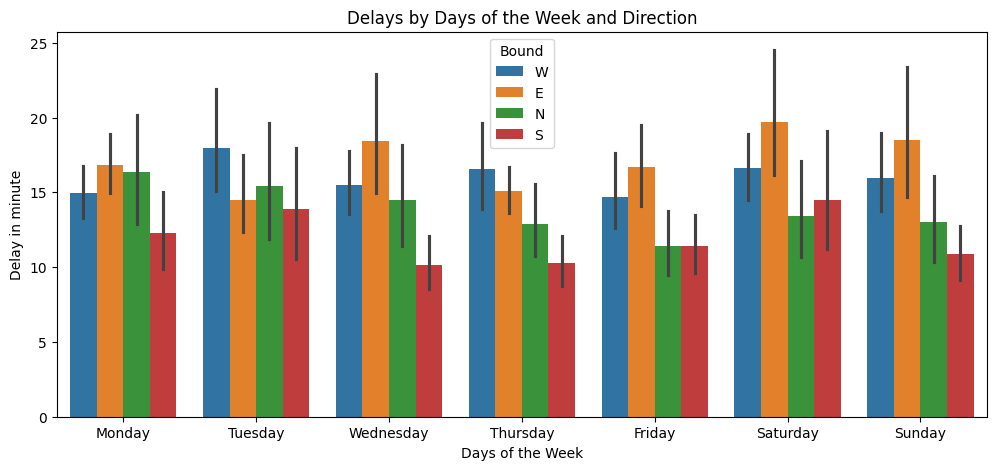

In [17]:
sc_no_B = sc[sc['Bound']!='B']
plt.figure(figsize=(12,5))
sns.barplot(x='Day', y='Min Delay',hue='Bound', data=sc_no_B);
plt.title("Delays by Days of the Week and Direction")
plt.xlabel("Days of the Week")
plt.ylabel("Delay in minute");

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [19]:
day_map = {
    'Monday': 0,
    'Tuesday': 1,
    'Wednesday': 2,
    'Thursday': 3,
    'Friday': 4,
    'Saturday': 5,
    'Sunday': 6
}
sc['Day_encoded'] = sc['Day'].map(day_map)
bound_map = {
    'E':0,
    'S':1,
    'W':2,
    'N':3,
    'B':4
}
sc['Bound_encoded'] = sc['Bound'].map(bound_map)
most_delayed_lines = sc['Line'].value_counts().head(20)
sc['most_delayed_line'] = sc['Line'].map(lambda x: most_delayed_lines.get(x, 0))
location_counts = sc['Location'].value_counts()
top_20_locations = location_counts.head(20).index 
sc['most_delayed_location'] = sc['Location'].apply(lambda x: 1 if x in top_20_locations else 0)

In [20]:
incident_avg_delay = sc.groupby('Incident')['Min Delay'].mean()

max_delay = incident_avg_delay.max()
incident_weights = incident_avg_delay / max_delay  

incident_weights_dict = incident_weights.to_dict()

sc['incident_weight'] = sc['Incident'].apply(lambda x: incident_weights_dict.get(x, 1))
#sc['Min_Gap_Incident_interaction'] = sc['Min Gap'] * sc['incident_weight']

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
# Create a new column for binary classification (1 if delay > 30 minutes, 0 otherwise)
sc0 = sc.copy()
sc0['Delay_Above_30'] = (sc0['Min Delay'] > 30).astype(int)
sc0.dropna()
# Features (exclude the 'Min Delay' and target column)
X = sc0.drop(['Min Delay','Delay_Above_30','Day','Date','Month','Time','Bound','Vehicle','Line','Location','Incident'], axis=1)

# Target (whether the delay is above 30 minutes or not)
y = sc0['Delay_Above_30']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Predict the target for the test set
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1828
           1       0.88      0.82      0.85       197

    accuracy                           0.97      2025
   macro avg       0.93      0.90      0.92      2025
weighted avg       0.97      0.97      0.97      2025



C:\Users\Elowe\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [22]:
# sc_new = pd.get_dummies(sc, columns=['Location', 'Incident'], drop_first=True)
less_30 = sc[sc['Min Delay'] <= 30]
greater_30 = sc[sc['Min Delay'] > 30]
X1 = less_30.drop(['Min Delay','Day','Date','Month','Time','Bound','Vehicle','Line','Location','Incident'], axis=1) 
y1 = less_30['Min Delay']

In [23]:
X1

,Min Gap,Hour,Day_encoded,Bound_encoded,most_delayed_line,most_delayed_location,incident_weight
0,20,2,0,2,1294,0,0.259376
2,0,3,0,3,703,0,0.259376
7,18,4,0,0,292,1,0.181035
8,28,4,0,0,1062,0,0.181035
9,30,4,0,2,2112,1,0.181035
...,...,...,...,...,...,...,...
13101,20,20,5,3,1136,1,0.243911
13104,0,23,5,0,366,0,0.556371
13105,20,23,5,0,1294,0,1.000000
13106,20,0,5,2,2112,0,0.257635


In [24]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [25]:
model1 = xgb.XGBRegressor(objective='reg:squarederror', eval_metric='rmse', random_state=42)
model1.fit(X1_train, y1_train)
y1_pred = model1.predict(X1_test)
mae = mean_absolute_error(y1_test, y1_pred)
rmse = np.sqrt(mean_squared_error(y1_test, y1_pred))

<Figure size 1200x800 with 0 Axes>

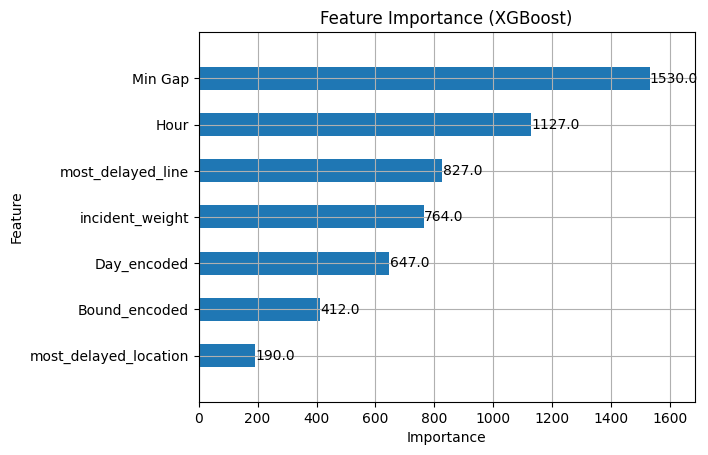

In [26]:
plt.figure(figsize=(12, 8))
xgb.plot_importance(model1, 
                    importance_type='weight',  # Can also use 'gain' or 'cover'
                    max_num_features=20,  # Limit to top 20 features (optional)
                    height=0.5,  # Height of the bars
                    title="Feature Importance (XGBoost)", 
                    xlabel="Importance", 
                    ylabel="Feature")
plt.show()

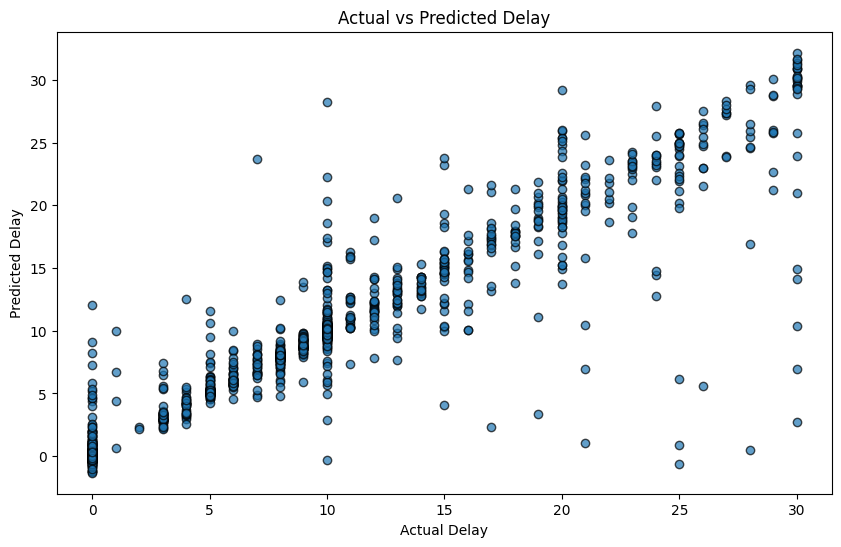

In [27]:
# Plotting Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y1_test, y1_pred, alpha=0.7, edgecolors='k')
#plt.plot([0, max(y1_test)], [0, max(y1_test)], 'r--', lw=2)  # Line of perfect prediction
plt.xlabel("Actual Delay")
plt.ylabel("Predicted Delay")
plt.title("Actual vs Predicted Delay")
plt.show()

<Figure size 1200x600 with 0 Axes>

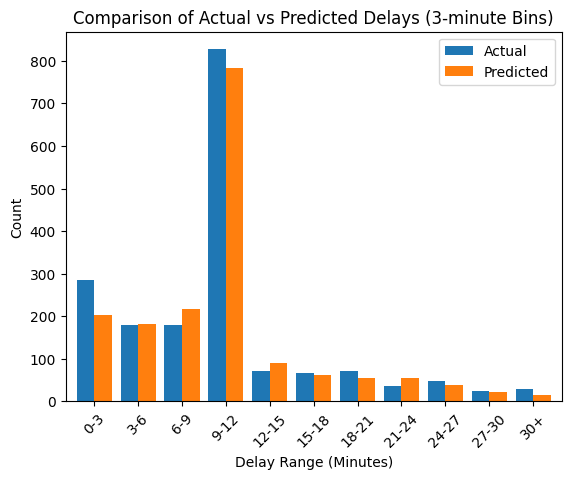

In [28]:
# Create the bins with 3-minute intervals
bins = list(range(0, 33, 3))  # [0, 3, 6, ..., 30]
bins.append(np.inf)  # To include values above 30 in the last bin
labels = ['0-3', '3-6', '6-9', '9-12', '12-15', '15-18', '18-21', '21-24', '24-27', '27-30', '30+']

# Bin the actual delays and predicted delays
actual_binned = pd.cut(y1_test, bins=bins, labels=labels, right=False)
predicted_binned = pd.cut(y1_pred, bins=bins, labels=labels, right=False)

# Count how many predictions fall into each bin for both actual and predicted delays
actual_counts = actual_binned.value_counts().sort_index()
predicted_counts = predicted_binned.value_counts().sort_index()

# Create a DataFrame to compare actual and predicted counts
comparison_df = pd.DataFrame({
    'Actual': actual_counts,
    'Predicted': predicted_counts
})

# Plot the comparison
plt.figure(figsize=(12, 6))
comparison_df.plot(kind='bar', width=0.8, color=['#1f77b4', '#ff7f0e'])
plt.title("Comparison of Actual vs Predicted Delays (3-minute Bins)")
plt.xlabel("Delay Range (Minutes)")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


In [29]:
greater_30 = sc[sc['Min Delay'] > 30]
X2 = greater_30.drop(['Min Delay','Day','Date','Month','Time','Bound','Vehicle','Line','Location','Incident'], axis=1) 
y2 = greater_30['Min Delay']
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)
model2 = xgb.XGBRegressor(objective='reg:squarederror', eval_metric='rmse', random_state=42)
model2.fit(X2_train, y2_train)
y2_pred = model2.predict(X2_test)
mae = mean_absolute_error(y2_test, y2_pred)
rmse = np.sqrt(mean_squared_error(y2_test, y2_pred))


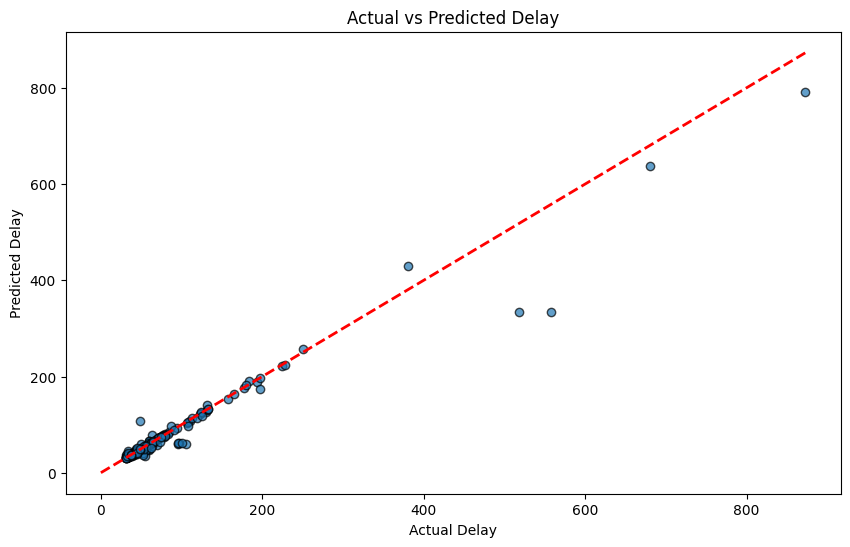

In [30]:
# Plotting Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y2_test, y2_pred, alpha=0.7, edgecolors='k')
plt.plot([0, max(y2_test)], [0, max(y2_test)], 'r--', lw=2)  # Line of perfect prediction
plt.xlabel("Actual Delay")
plt.ylabel("Predicted Delay")
plt.title("Actual vs Predicted Delay")
plt.show()